In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import *
import scipy.io as scio
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [2]:
save_image_file = './image_save/'
save_data_file = './data_save/'

In [3]:
# 读取excel数据
data = pd.read_excel(io = save_data_file+"compare_data.xlsx")
# 查看数据描述
data.describe

<bound method NDFrame.describe of       fitting time  fitting data  experiment time  experiment data
0              0.0             0          0.01121               26
1              0.2             0          0.20034               18
2              0.4             0          0.40034               14
3              0.6             0          0.60034               12
4              0.8             0          0.80120               11
...            ...           ...              ...              ...
1060         212.0            38        212.00035               39
1061         212.2            38        212.20035               39
1062         212.4            38        212.40035               39
1063         212.6            38        212.60035               39
1064         212.8            38        212.80176               39

[1065 rows x 4 columns]>

In [8]:
## 处理拟合数据和实验数据 ##
fitting_data = np.array(data['fitting data'].values.tolist()[53:])
experiment_data= np.array(data['experiment data'].values.tolist()[53:])

fitting_time= np.array(data['fitting time'].values.tolist()[53:])
experiment_time= np.array(data['experiment time'].values.tolist()[53:])

# 根据拟合数据的变化，将实验数据分成上升和下降阶段，并对这些阶段的数据进行相应处理
# 在此处分别保存实验过程的8次激发和衰减值变化的一维数组为一个列表，并使用一个列表存储全部的子列表

find_up_time = [0]
init_time_fit = fitting_time[0]
init_time_experiment = experiment_time[0]
for i in range(fitting_time.shape[0]):
    fitting_time[i] -= init_time_fit
    experiment_time[i] -= init_time_experiment
    if i != fitting_time.shape[0]-1 and i!=0:
        if fitting_data[i+1]>fitting_data[i] and fitting_data[i]<=fitting_data[i-1]:
            find_up_time.append(i)
up_matrix_experiment = []
up_list_fit = []
down_matrix_experiment = []
temp_down = []
init_value = 0
i = 0
while i < fitting_time.shape[0]:

    if i in find_up_time:
        for j in range(1,len(temp_down),1):
            temp_down[j] = temp_down[j]/init_value
        down_matrix_experiment.append(temp_down)
        temp_down = [1.0]
        
        temp_up = []
        temp_up2 = []
        while experiment_data[i]<experiment_data[i+1]:
            temp_up.append(experiment_data[i])
            temp_up2.append(fitting_data[i])
            i+=1
        temp_up.append(experiment_data[i])
        temp_up2.append(fitting_data[i])
        
        init_value = experiment_data[i]
        
        temp = temp_up[0]
        for j in range(len(temp_up)):
            temp_up[j] -= temp
        up_matrix_experiment.append(temp_up)
        if len(up_list_fit) == 0 :
            up_list_fit = temp_up2
    else:
        temp_down.append(experiment_data[i])
    i+=1
    
for i in range(1,len(temp_down),1):
    temp_down[i] = temp_down[i]/init_value
down_matrix_experiment.append(temp_down)
down_matrix_experiment.remove(down_matrix_experiment[0])
# print(up_list_fit)
# print(down_list_fit)
for i in range(len(down_matrix_experiment)):
    print([f"{value:.3f}" for value in up_matrix_experiment[i]])
    print([f"{value:.3f}" for value in down_matrix_experiment[i]])

['0.000', '233.000', '273.000', '314.000', '355.000', '394.000']
['1.000', '0.810', '0.442', '0.368', '0.322', '0.287', '0.261', '0.244', '0.228', '0.221', '0.211', '0.203', '0.195', '0.190', '0.183', '0.178', '0.175', '0.170', '0.168', '0.162', '0.160', '0.157', '0.155', '0.152', '0.150', '0.147', '0.147', '0.145', '0.142', '0.142', '0.140', '0.140', '0.137', '0.137', '0.137', '0.135', '0.132', '0.132', '0.132', '0.129', '0.129', '0.129', '0.127', '0.127', '0.127', '0.124', '0.124', '0.124', '0.122', '0.119', '0.119']
['0.000', '212.000', '277.000', '331.000', '377.000', '413.000']
['1.000', '0.811', '0.470', '0.402', '0.357', '0.322', '0.296', '0.276', '0.261', '0.248', '0.235', '0.226', '0.217', '0.213', '0.207', '0.202', '0.198', '0.193', '0.191', '0.187', '0.185', '0.180', '0.178', '0.176', '0.174', '0.172', '0.170', '0.167', '0.167', '0.165', '0.163', '0.163', '0.159', '0.159', '0.157', '0.157', '0.154', '0.154', '0.152', '0.150', '0.150', '0.148', '0.148', '0.148', '0.146', '0.1

In [9]:
# 根据时间计算衰减率
down = scio.loadmat('../down.mat')["p2"][0]
def caculate_signal_down(x,down):
    down_ratio = down[0] * math.exp(-down[1]*x) + down[2] + \
                 down[3] * math.exp(-down[4]*x) + down[5] + \
                 down[6] * math.exp(-down[7]*x) + down[8]
    return down_ratio
down_list_fit = []
for i in fitting_time:
    down_list_fit.append(caculate_signal_down(i,down))
# print(down_list_fit)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22752\3741467133.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),color = 'black', weight = 'bold')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22752\3741467133.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),color = 'black', weight = 'bold')


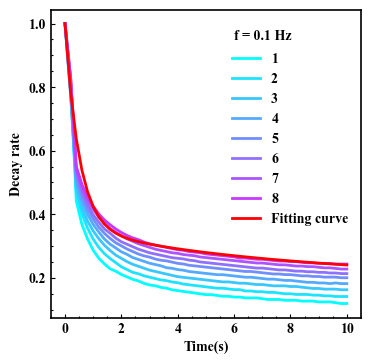

In [10]:
## 绘制衰减率曲线（已废弃绘制上升率曲线） ##

def getColor(num_colors,index):
    colormap = plt.cm.cool
    color_values = np.linspace(0, 1, num_colors)
    colors_list = [colormap(value) for value in color_values]
    return colors_list[index]

def draw_attenuation_rate(down_matrix_experiment,down_list_fit):
    time_sequence = np.arange(0,len(down_matrix_experiment[0])/5,0.2)
    
    # 设置字体为Times New Roman
    plt.rc('font',family='Times New Roman')
    # 图像绘制，创建画布
    fig, ax = plt.subplots(figsize=(4,4))
    
    for i in range(len(down_matrix_experiment)):
        ax.plot(time_sequence, down_matrix_experiment[i][0:len(down_matrix_experiment[0])], color=getColor(10,i), label=str(i+1), linewidth = 2)
    ax.plot(time_sequence,down_list_fit[0:len(down_matrix_experiment[0])],color='red', label='Fitting curve', linewidth = 2)
    
    # 设置主刻度
    ax.tick_params(axis='x', direction='in', which='major', length=3, width=0.8)
    ax.tick_params(axis='y', direction='in', which='major', length=3, width=0.8)

    # 设置并激活次要刻度
    ax.minorticks_on()
    ax.tick_params(axis='x', direction='in', which='minor', length=1.5, width=0.8)
    ax.tick_params(axis='y', direction='in', which='minor', length=1.5, width=0.8)
    
    ax.set_xticklabels(ax.get_xticklabels(),color = 'black', weight = 'bold')
    ax.set_yticklabels(ax.get_yticklabels(),color = 'black', weight = 'bold')
    
    plt.xlabel('Time(s)', fontsize = 10, color = 'black', weight = 'bold')
    plt.ylabel('Decay rate',fontsize = 10, color = 'black', weight = 'bold')
    
    f = fm.FontProperties(weight ='bold')
    plt.legend(loc='upper right', fontsize=9, bbox_to_anchor=(1,0.9), frameon=False, prop = f)
    
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_linewidth(1.2)  
    ax.spines['left'].set_linewidth(1.2)  
    ax.spines['top'].set_linewidth(1.2)    
    ax.spines['right'].set_linewidth(1.2)
    
    
    plt.text(6, 0.95, 'f = 0.1 Hz', fontsize=10, color = 'black', weight = 'bold')
    
    plt.savefig(save_image_file + 'Decay_rate.tiff', bbox_inches = 'tight', pad_inches = 0.05, dpi = 600)
    plt.savefig(save_image_file + 'Decay_rate.eps', bbox_inches = 'tight', pad_inches = 0.05)
    plt.show()
    plt.rcdefaults()
draw_attenuation_rate(down_matrix_experiment,down_list_fit)

# 衰减率信息保存为excel
columns_list = ['1','2','3','4','5','6','7','8','Fitting curve']
df = pd.DataFrame(data = np.zeros((len(down_matrix_experiment[0]),len(columns_list))) ,columns = columns_list)

for i in range(len(down_matrix_experiment)):
    for j in range(len(down_matrix_experiment[0])):
        df.iloc[j,i] = down_matrix_experiment[i][j]
        
for i in range(len(down_matrix_experiment[0])):
    df.iloc[i,8] = down_list_fit[i]
with pd.ExcelWriter(save_data_file+'Leakage_rate.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=True)
    

In [11]:
## 计算拟合数据和实验数据之间的误差和关系系数 ##

# 计算平均绝对误差
print(mean_absolute_error(fitting_data,experiment_data))

# 计算平均相对误差
epsilon = np.finfo(np.float64).eps
relative_errors = np.abs(fitting_data - experiment_data) / np.maximum(np.abs(experiment_data), epsilon)
print(np.mean(relative_errors) * 100)

# 计算均方根误差
print(np.sqrt(mean_squared_error(fitting_data,experiment_data)))

# 计算r方
print(r2_score(fitting_data,experiment_data))

# 计算平均绝对百分比误差
print(mean_absolute_percentage_error(fitting_data,experiment_data))

14.150197628458498
15.128940638277633
23.703913053990608
0.920123864317293
0.10552037457221261
